In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\singh\\Downloads\\Real_fake_news (1).csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [4]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
4865,2431,2431,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,2432,2432,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,2433,2433,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,2434,2434,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0
4869,2435,2435,Bill McCarthy,"""Twitter caught leaking Donald Trump’s private...",Bloggers,False,FAKE,0


In [5]:
df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
author             object
statement          object
source             object
target               bool
BinaryTarget       object
BinaryNumTarget     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4870 non-null   int64 
 1   Unnamed: 0.1     4870 non-null   int64 
 2   author           4870 non-null   object
 3   statement        4870 non-null   object
 4   source           4870 non-null   object
 5   target           4870 non-null   bool  
 6   BinaryTarget     4870 non-null   object
 7   BinaryNumTarget  4870 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 271.2+ KB


In [7]:
df.isnull()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4865,False,False,False,False,False,False,False,False
4866,False,False,False,False,False,False,False,False
4867,False,False,False,False,False,False,False,False
4868,False,False,False,False,False,False,False,False


In [8]:
df.shape


(4870, 8)

In [9]:
# Dropping the unnecessary columns
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [10]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [11]:
# Dropping the rows with null values
df.dropna()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1
...,...,...,...,...,...,...
4865,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0


In [12]:
#FInding rows that have duplicate values
df[df.duplicated(keep = 'last')] 

,author,statement,source,target,BinaryTarget,BinaryNumTarget
1406,Sue Owen,Says Milken Institute rated San Antonio as nat...,Julián Castro,True,REAL,1
4249,Daniel Funke,Says a series of photos show Iranian rockets b...,Facebook posts,False,FAKE,0


In [13]:
#Removing the duplicates
df = df.drop_duplicates(subset = None, keep ='first')

In [14]:
df.BinaryNumTarget.value_counts()

0    2434
1    2434
Name: BinaryNumTarget, dtype: int64

In [15]:
# Defining numerical and categorical variables
num_atr=[]

cat_atr=['author' , 'statement' , 'source']

In [16]:
# Correlation Matrix
df.corr()

,target,BinaryNumTarget
target,1.0,1.0
BinaryNumTarget,1.0,1.0


In [17]:
df.dtypes

author             object
statement          object
source             object
target               bool
BinaryTarget       object
BinaryNumTarget     int64
dtype: object

In [18]:
df.columns

Index(['author', 'statement', 'source', 'target', 'BinaryTarget',
       'BinaryNumTarget'],
      dtype='object')

In [19]:
# Random Forest Classification

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [21]:
X= df.drop(['BinaryNumTarget', 'BinaryTarget', 'target'], axis=1)
y= df['BinaryNumTarget']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
X_train[cat_atr].head()

,author,statement,source
2175,Angie Drobnic,"""President Obama himself attempted to filibust...",Jon Kyl
4735,Manuela Tobias,"""Protections on pre-existing conditions have b...",Kevin Cramer
1151,Janie Har,"""Over the past twenty years, the number of hom...",Doug Whitsett
3873,Ciara O'Rourke,The man pictured in a mugshot is not Derek Cha...,Viral image
1529,Joe Guillen,"""Tourism accounts for 439,000 jobs in the stat...",Mike Dovilla


In [23]:
X.shape

(4868, 3)

In [24]:
y.shape

(4868,)

In [25]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
Xtr = X_train[cat_atr]
Xtr.shape 

(3407, 3)

In [27]:
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

Xtr1 = X_test[cat_atr] 
Xtr1.shape 

(1461, 3)

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

In [29]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47638603696098564


In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[ 14, 715],
       [ 50, 682]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.02      0.04       729
           1       0.49      0.93      0.64       732

    accuracy                           0.48      1461
   macro avg       0.35      0.48      0.34      1461
weighted avg       0.35      0.48      0.34      1461



In [32]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
df.feature_names = df[['author', 'statement', 'source']]
df.target_names = df['BinaryNumTarget']

<ipython-input-33-10b814720e0d>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['author', 'statement', 'source']]
<ipython-input-33-10b814720e0d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df['BinaryNumTarget']


In [34]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

2    0.407467
1    0.337685
0    0.254848
dtype: float64

In [35]:
list(zip(df.columns, feature_imp))

[('author', 0.4074667653206795),
 ('statement', 0.337685173992209),
 ('source', 0.2548480606871115)]

No handles with labels found to put in legend.


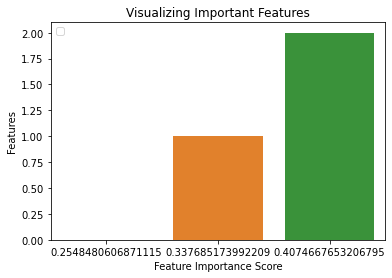

In [36]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47091033538672145


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.03      0.05       729
           1       0.49      0.91      0.63       732

    accuracy                           0.47      1461
   macro avg       0.36      0.47      0.34      1461
weighted avg       0.36      0.47      0.34      1461

